# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('Dataset_clustering.csv')
df_copy = df.copy()
print("Jumlah baris beserta kolom:", df.shape)
df.head()

Jumlah baris beserta kolom: (2512, 16)


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### Memahami Karakteristik Data

- Memahami Struktur Data

In [3]:
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

- Analisi Distribusi dan Korelasi

In [4]:
print ("Analisis Variabel Numeric")
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
df[numeric_cols].describe()

Analisis Variabel Numeric


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


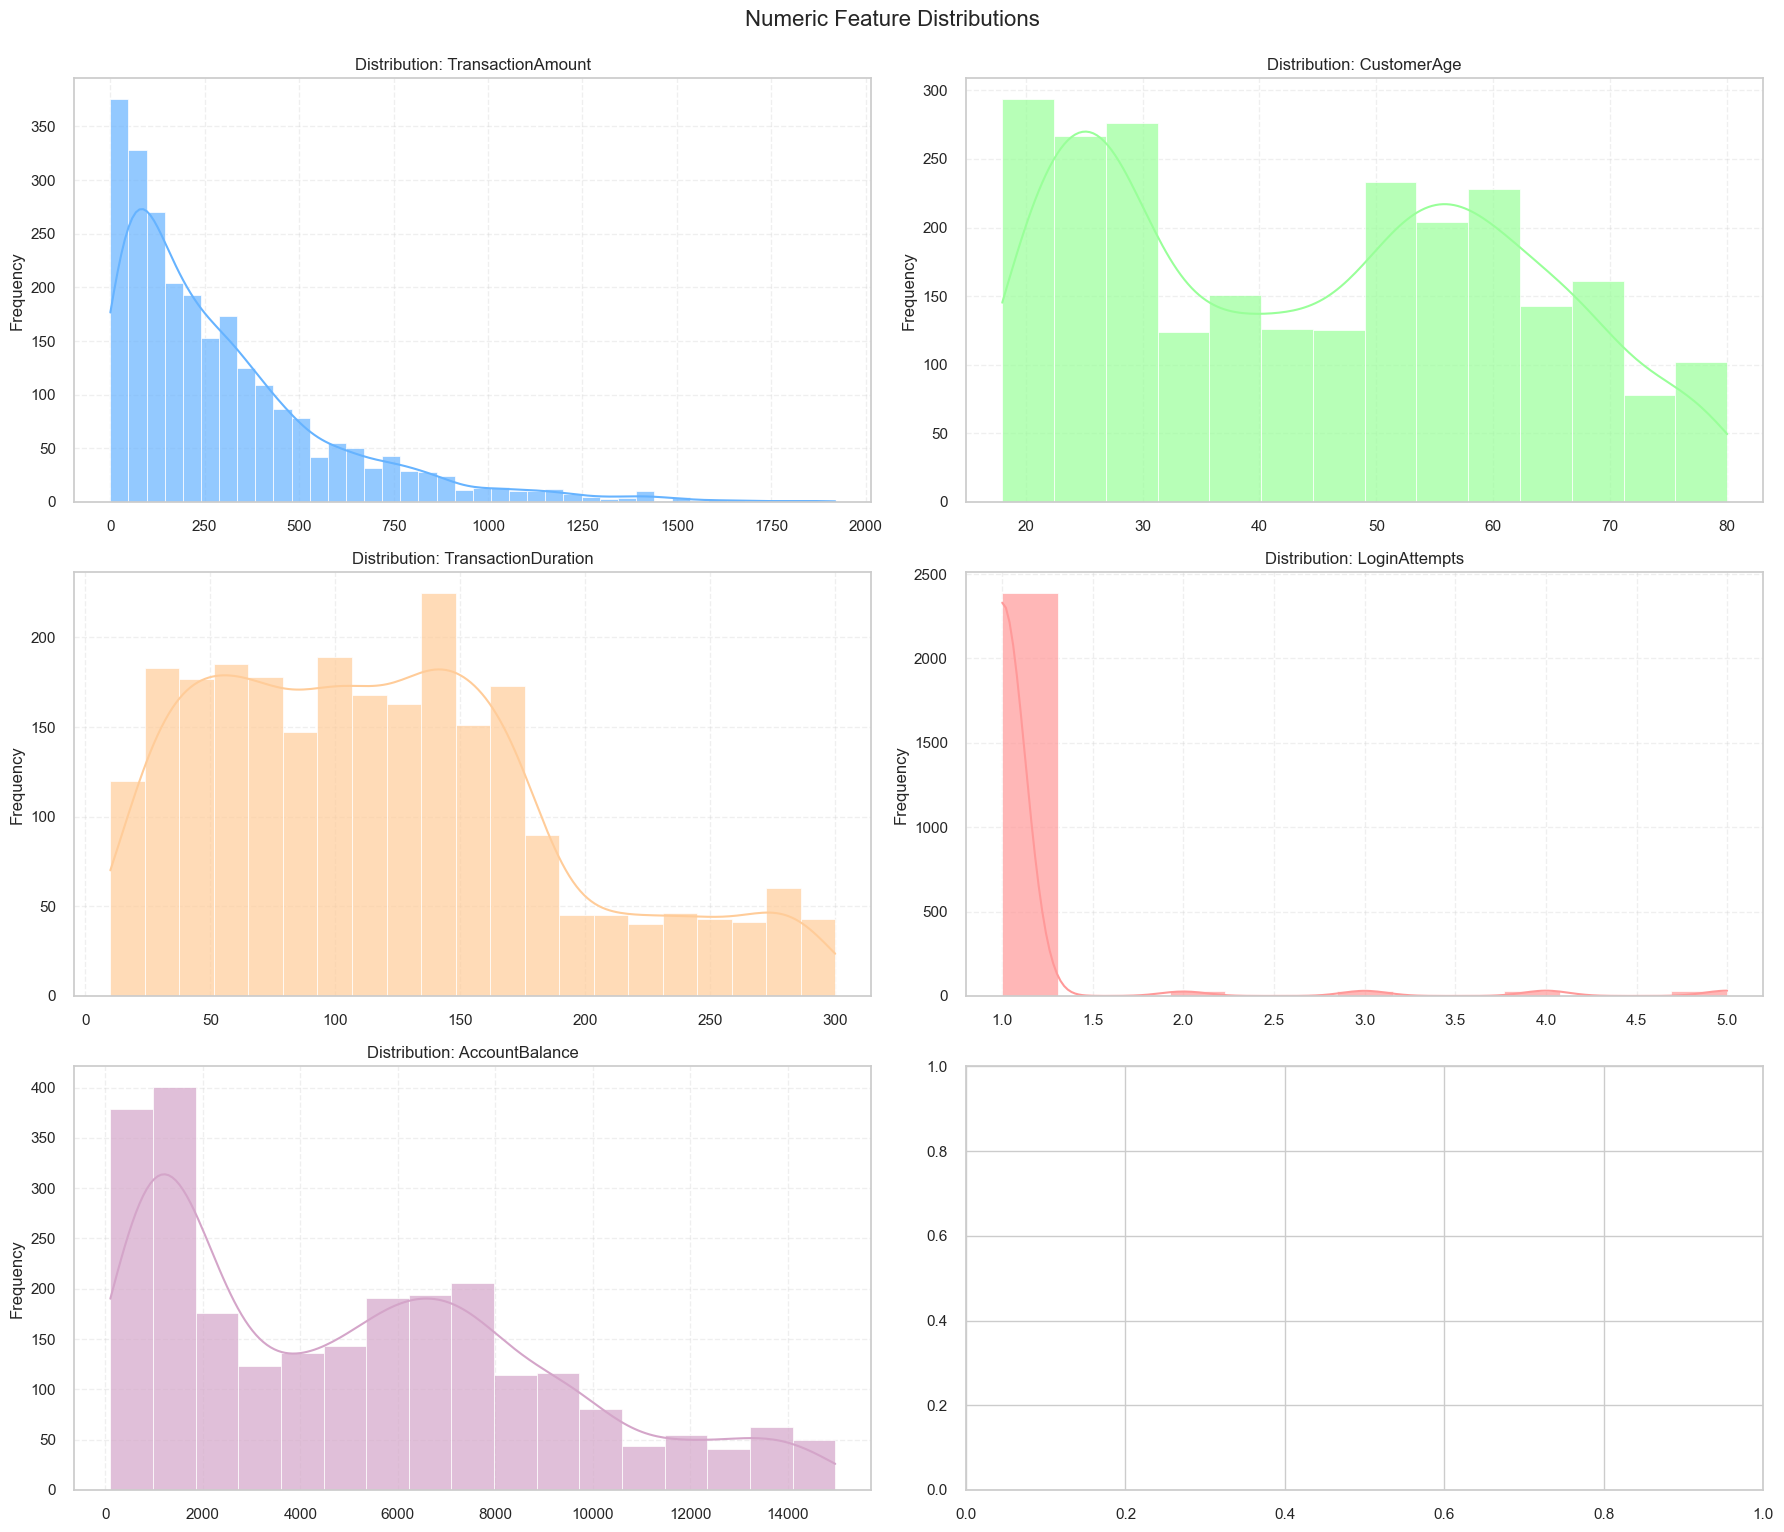

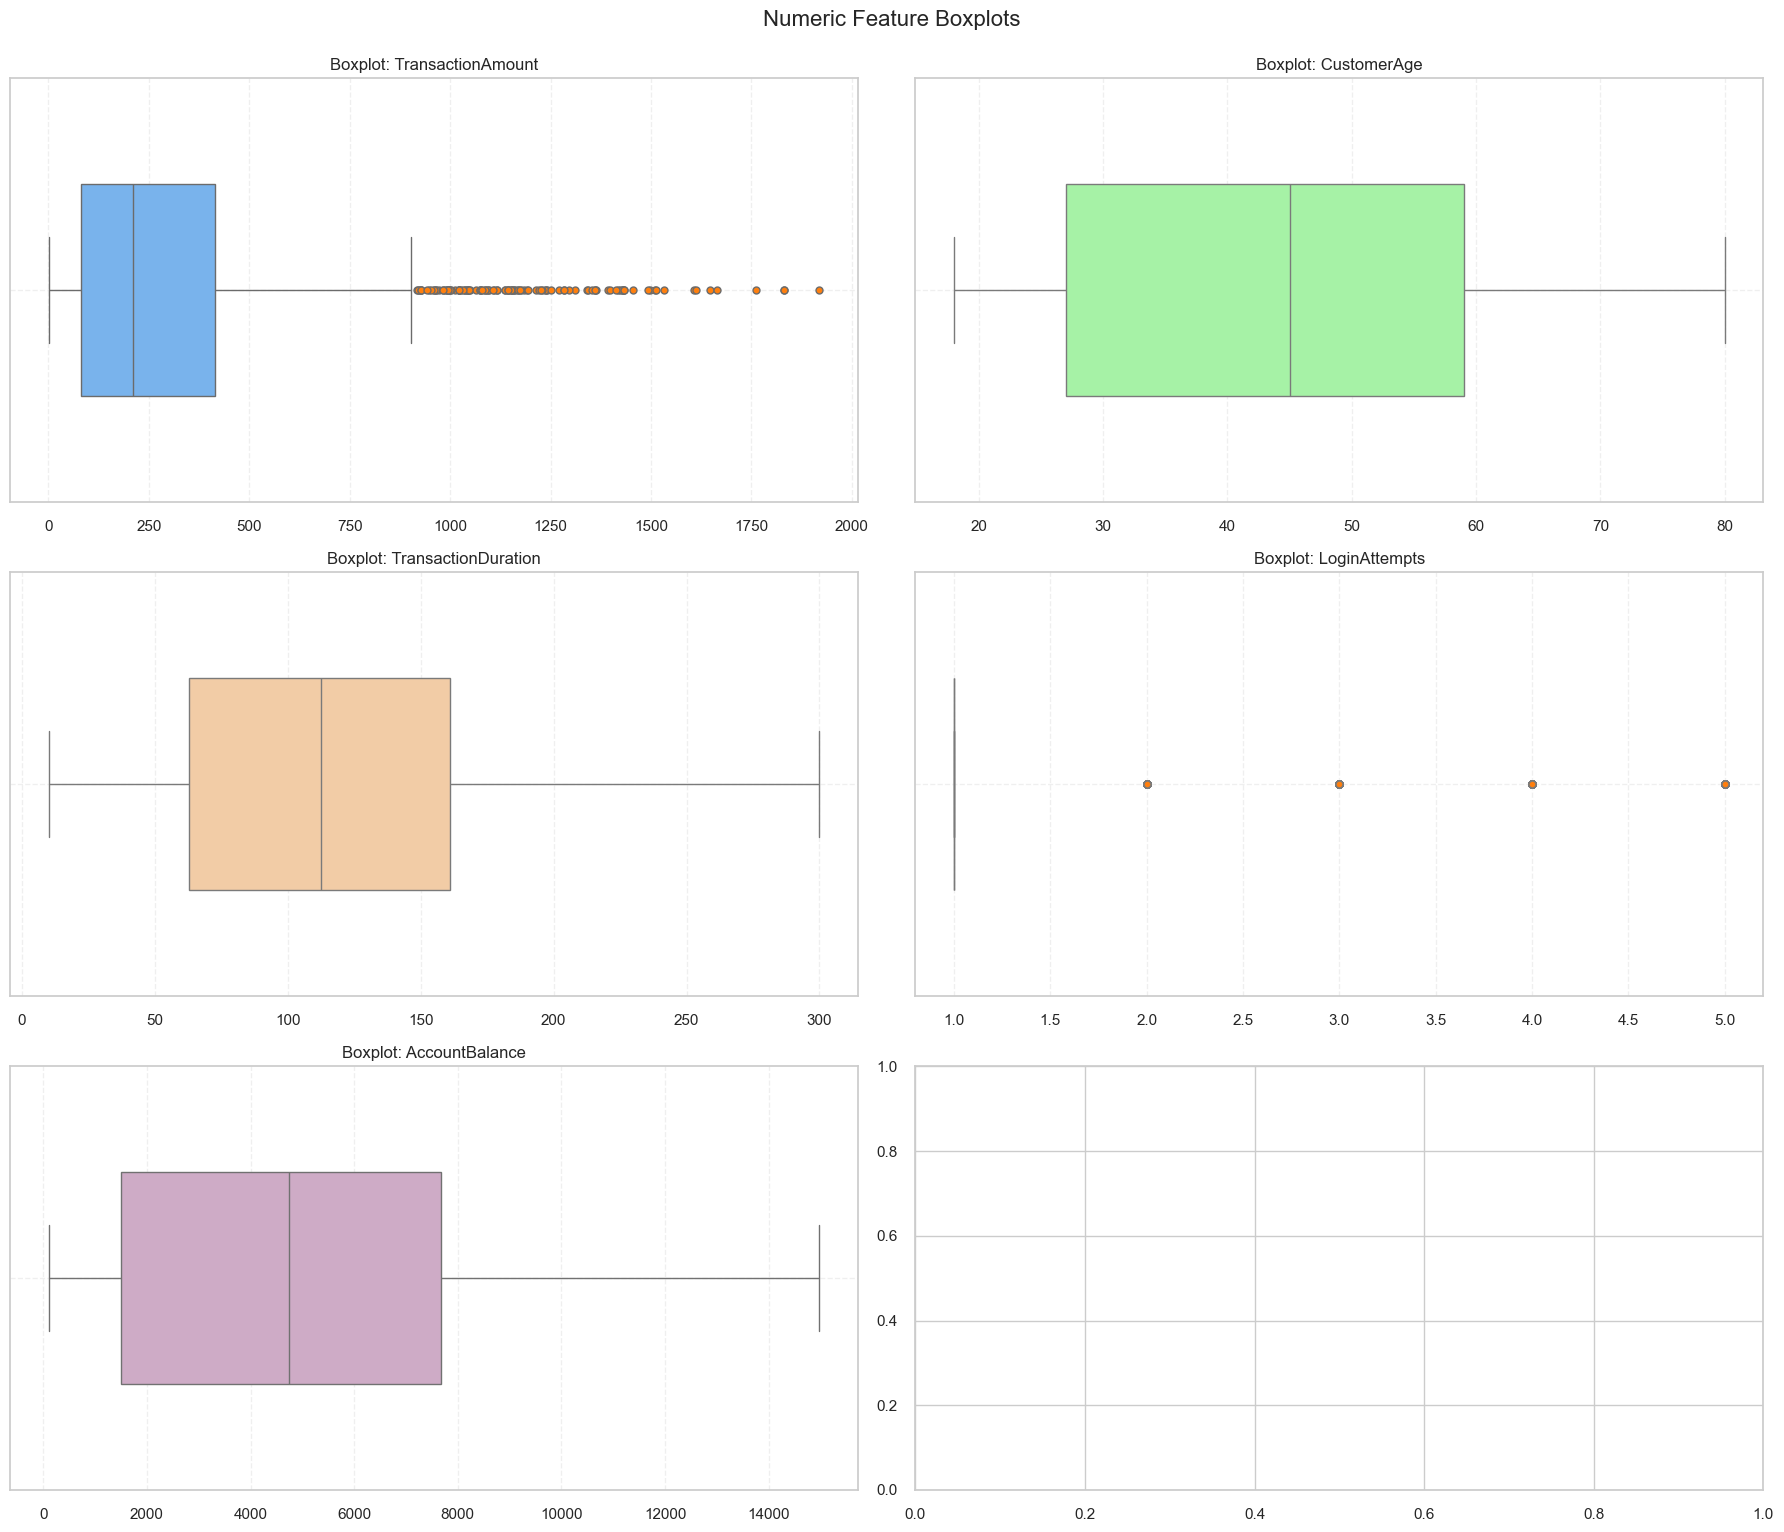

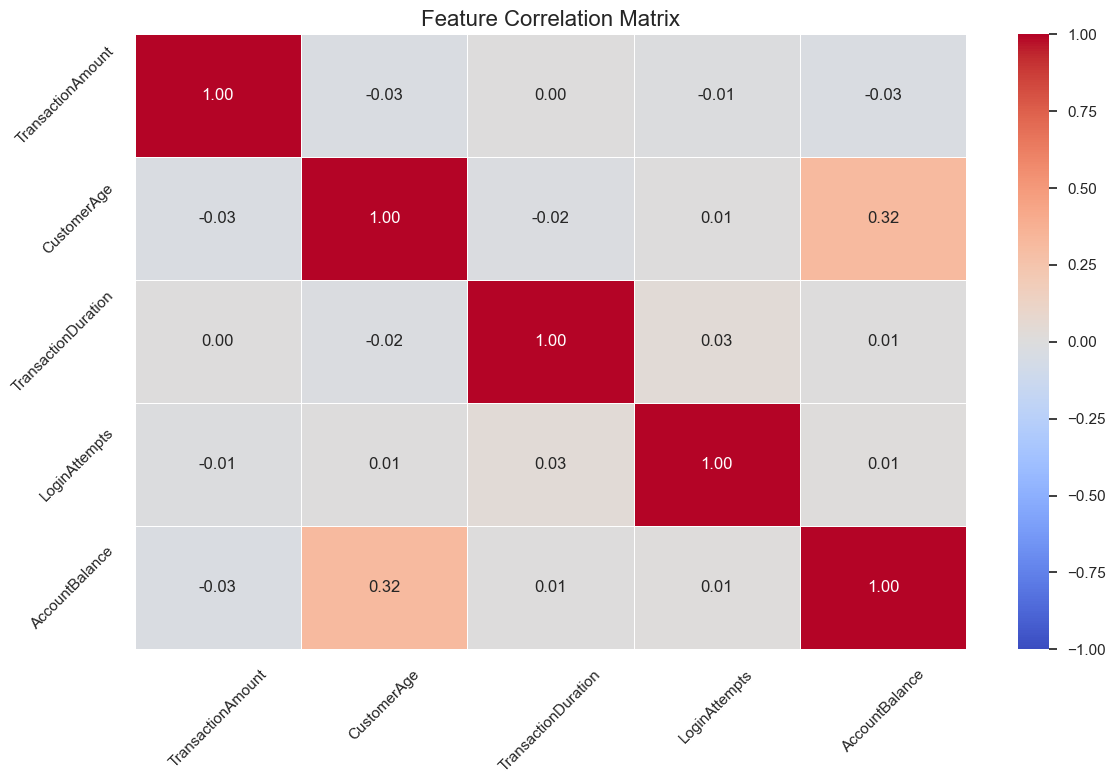

In [ ]:
sns.set(style="whitegrid", palette="pastel")

# Create a custom color palette for better visualization
custom_palette = ["#66b3ff", "#99ff99", "#ffcc99", "#ff9999", "#d4a5c9", "#8dd3c7"]

# 1. Distribution Plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))

for i, col in enumerate(numeric_cols):
    row = i // 2
    col_index = i % 2
    
    # Use KDE with fill for better visibility
    sns.histplot(df[col], kde=True, ax=axes[row, col_index], 
                 color=custom_palette[i], edgecolor='white', 
                 linewidth=0.5, alpha=0.7)
    axes[row, col_index].set_title(f'Distribution: {col}', fontsize=12)
    axes[row, col_index].set_xlabel('')
    axes[row, col_index].set_ylabel('Frequency')
    axes[row, col_index].grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.suptitle("Numeric Feature Distributions", fontsize=16, y=1.02)
plt.show()

# 2. Box Plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))

for i, col in enumerate(numeric_cols):
    row = i // 2
    col_index = i % 2
    
    # Use consistent color with distribution plots
    sns.boxplot(x=df[col], ax=axes[row, col_index], 
                color=custom_palette[i], width=0.5,
                flierprops=dict(markerfacecolor='#ff7f0e', markersize=5))
    axes[row, col_index].set_title(f'Boxplot: {col}', fontsize=12)
    axes[row, col_index].set_xlabel('')
    axes[row, col_index].grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.suptitle("Numeric Feature Boxplots", fontsize=16, y=1.02)
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(12, 8))

sns.heatmap(df[numeric_cols].corr(), annot=True, 
            cmap="coolwarm", fmt=".2f", 
            center=0, vmin=-1, vmax=1,
            linewidths=0.5, linecolor='white')
plt.title('Feature Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

- Visualisasi Data

In [6]:
categorical_cols = ['TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation']
id_cols = ['TransactionID', 'AccountID']
datetime_cols = ['TransactionDate', 'PreviousTransactionDate']
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])


Visualisasi Data Kategorikal


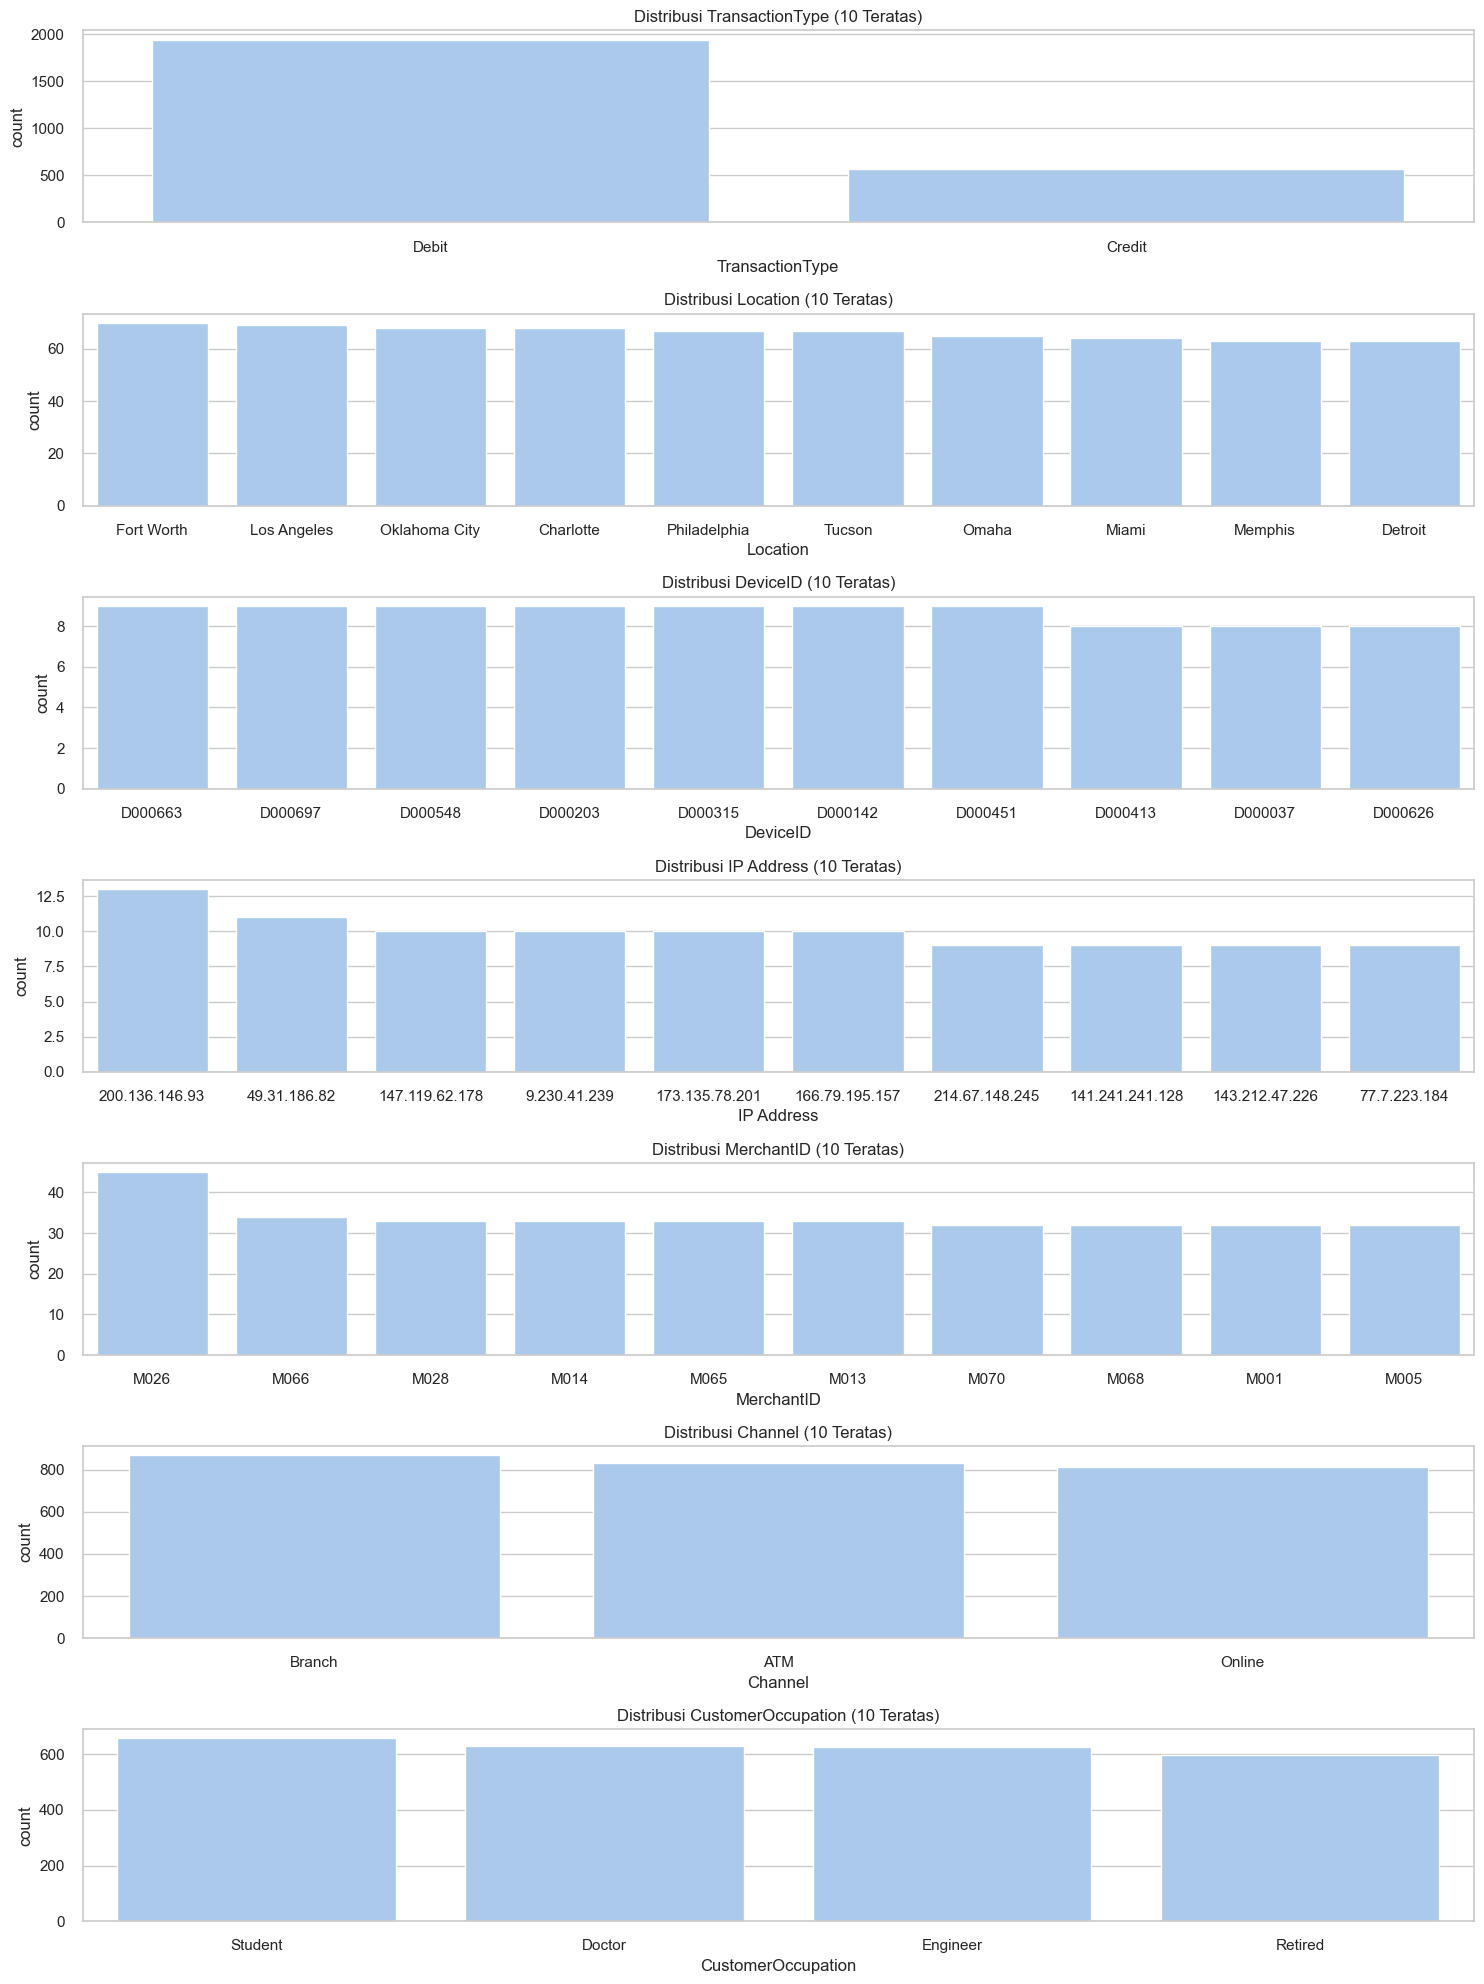

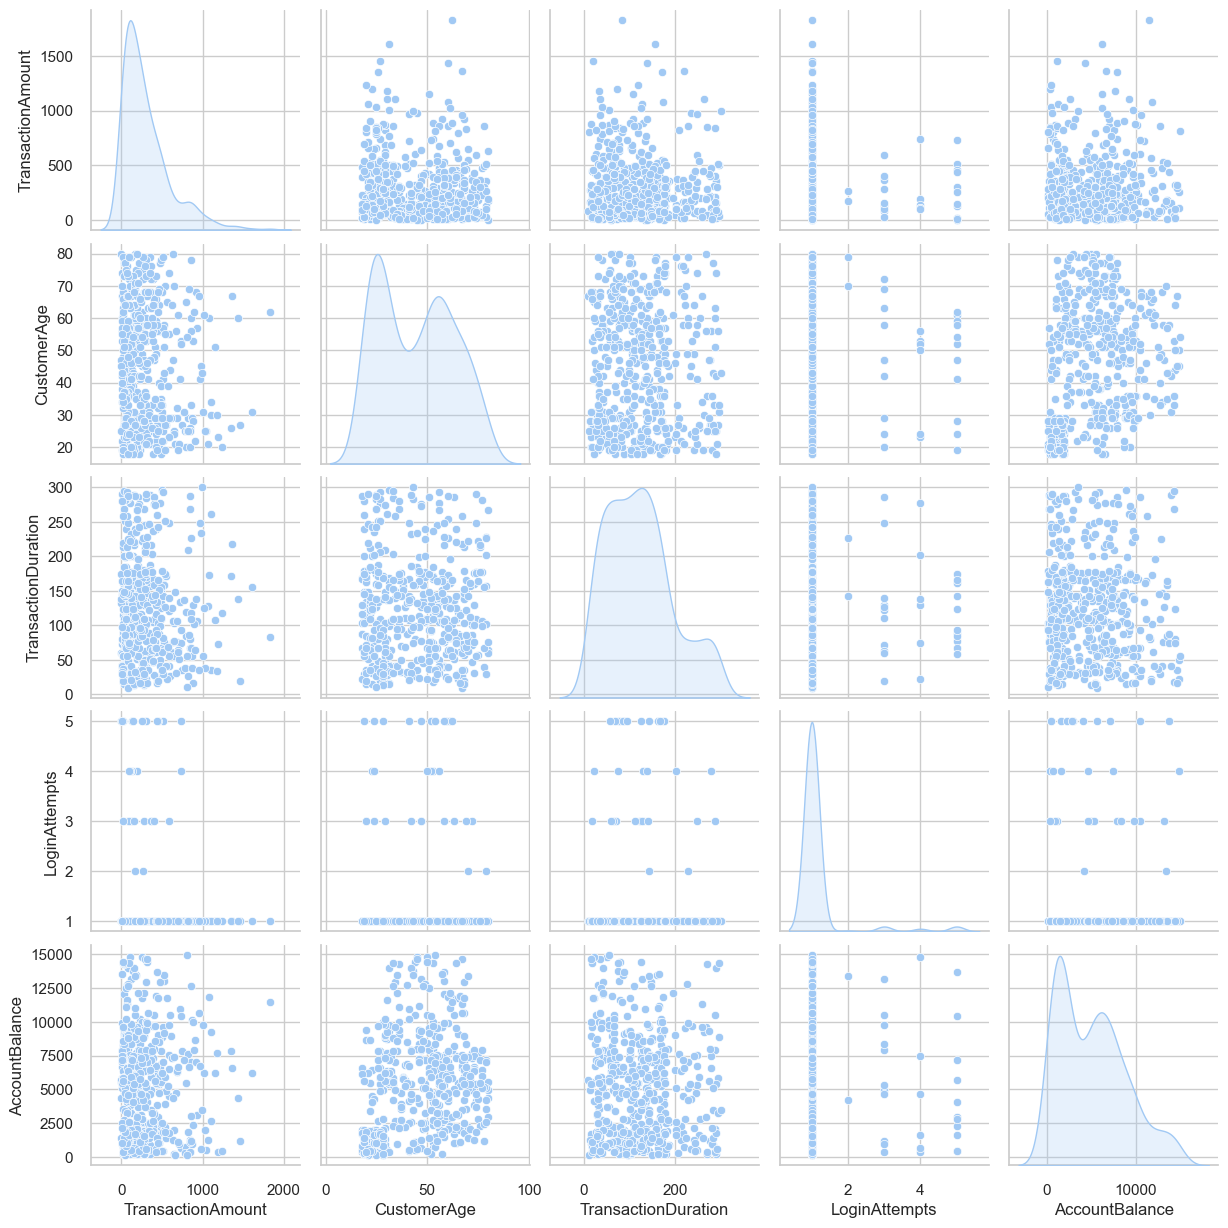

In [7]:
print("\nVisualisasi Data Kategorikal")
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    top_categories = df[col].value_counts().index[:10]
    sns.countplot(x=col, data=df[df[col].isin(top_categories)], order=top_categories)
    plt.title(f'Distribusi {col} (10 Teratas)')
plt.tight_layout()
sns.pairplot(df[numeric_cols].sample(500), diag_kind='kde')
plt.show()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

- Cek Kolom Missing Values

In [ ]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

- Menghapus data duplikat

In [9]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

- Memeriksa Outlier

In [10]:
numeric_cols = ['TransactionAmount', 'CustomerAge', 'AccountBalance']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"Outlier pada {col}: {len(outliers)} data")

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

Outlier pada TransactionAmount: 113 data
Outlier pada CustomerAge: 0 data
Outlier pada AccountBalance: 0 data


- Encoding data kategorikal

In [11]:
df_bank = df[~(
    (df[numeric_cols] < (Q1 - 1.5 * IQR)) | 
    (df[numeric_cols] > (Q3 + 1.5 * IQR))
).any(axis=1)]

selected_features = [
    'TransactionAmount', 'TransactionType', 'Channel',
    'TransactionDuration', 'AccountBalance', 'CustomerAge'
]
df_bank = df_bank[selected_features]

categorical_features = ['TransactionType', 'Channel']
numerical_features = [
    'TransactionAmount', 'TransactionDuration',
    'CustomerAge', 'AccountBalance'
]

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_encoded = encoder.fit_transform(df_bank[categorical_features])
categorical_df = pd.DataFrame(
    categorical_encoded, 
    columns=encoder.get_feature_names_out()
)

scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(df_bank[numerical_features])
numerical_df = pd.DataFrame(numerical_scaled, columns=numerical_features)

df_pre_feature_selection = pd.concat([numerical_df, categorical_df], axis=1)

df_pre_feature_selection.head()



,TransactionAmount,TransactionDuration,CustomerAge,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online
0,0.015144,0.244828,0.838710,0.336832,0.0,1.0,1.0,0.0,0.0
1,0.411703,0.451724,0.806452,0.918055,0.0,1.0,1.0,0.0,0.0
2,0.138004,0.158621,0.016129,0.068637,0.0,1.0,0.0,0.0,1.0
3,0.201745,0.051724,0.129032,0.569198,0.0,1.0,0.0,0.0,1.0
4,0.014443,0.648276,0.129032,0.492591,1.0,0.0,0.0,0.0,1.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [12]:
kmeans_before = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_before = kmeans_before.fit_predict(df_pre_feature_selection)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [13]:
silhouette_before = silhouette_score(df_pre_feature_selection, clusters_before)
print(f"Silhouette Score sebelum feature select: {silhouette_before:.2f}")

Silhouette Score sebelum feature select: 0.30


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

d:\DBS\latihan\ML\Submission\venv\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
d:\DBS\latihan\ML\Submission\venv\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
d:\DBS\latihan\ML\Submission\venv\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


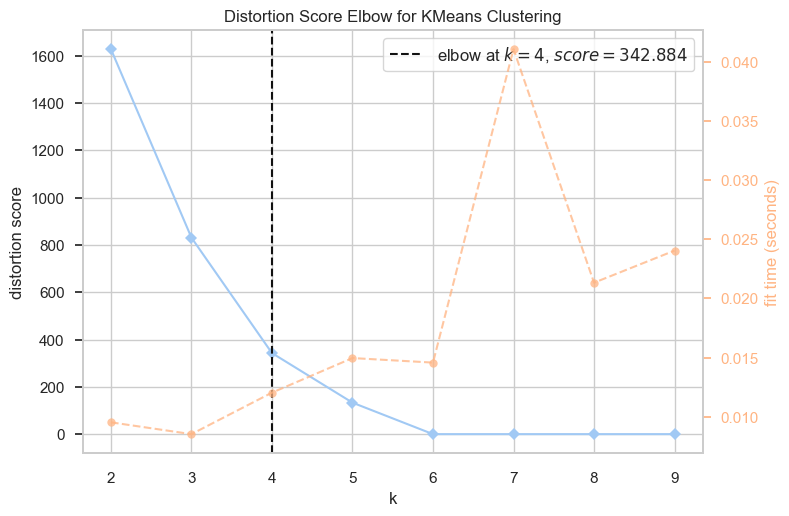

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
selector = SelectKBest(mutual_info_classif, k=5)
X_selected = selector.fit_transform(df_pre_feature_selection, clusters_before)
kmeans = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(X_selected)
visualizer.show()

In [15]:
kmeans_after = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters_after = kmeans_after.fit_predict(X_selected)

silhouette_after = silhouette_score(X_selected, clusters_after)
print(f"Silhouette Score setelah feature select: {silhouette_after:.2f}")

selected_feature_indices = selector.get_support(indices=True)
df_selected = df_pre_feature_selection.iloc[:, selected_feature_indices].copy()
df_selected['Cluster'] = clusters_after

Silhouette Score setelah feature select: 0.86


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

- Hasil cluster dengan 2D PCA

Jumlah data points: 2512
Jumlah cluster: 4
Explained Variance Ratio: [0.41452619 0.32903384]


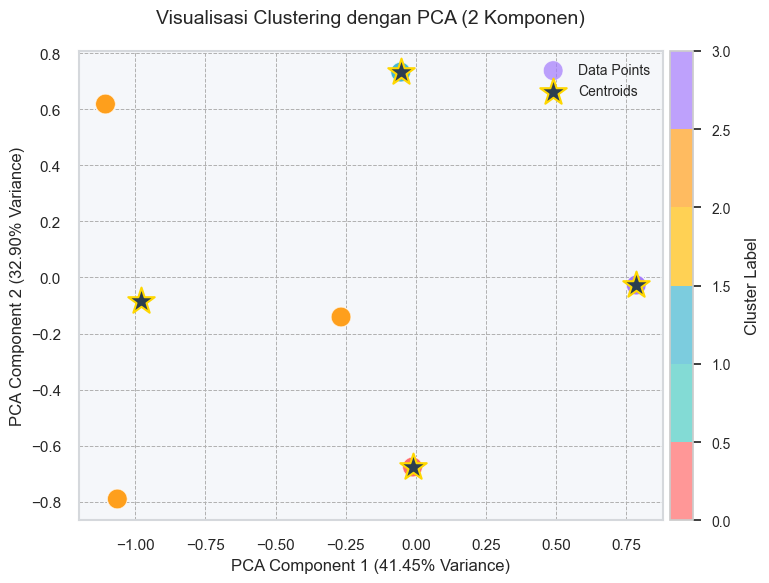

In [ ]:
# Menggunakan palet warna yang lebih menarik
custom_palette = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFBE0B', '#FF9F1C', '#A37AFC']

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_selected)
centroids_pca = pca.transform(kmeans_after.cluster_centers_)

print(f"Jumlah data points: {X_pca.shape[0]}")
print(f"Jumlah cluster: {len(np.unique(clusters_after))}")

explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")

plt.figure(figsize=(8, 6))

# Membuat scatter plot dengan palet warna custom dan efek visual yang lebih baik
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=clusters_after, 
                     cmap=ListedColormap(custom_palette), 
                     alpha=0.7, 
                     s=200,
                     edgecolors='white',
                     linewidth=0.5,
                     label="Data Points")

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            c='#2C3E50', 
            marker='*', 
            s=400, 
            edgecolors='gold',
            linewidth=1.5,
            label="Centroids")

plt.gca().set_facecolor('#F5F7FA')
plt.grid(color='#B0B0B0', linestyle='--', linewidth=0.7)

cbar = plt.colorbar(scatter, pad=0.01)
cbar.set_label('Cluster Label', fontsize=12, labelpad=10)
cbar.ax.tick_params(labelsize=10)

plt.xlabel(f'PCA Component 1 ({explained_variance[0]:.2%} Variance)', fontsize=12)
plt.ylabel(f'PCA Component 2 ({explained_variance[1]:.2%} Variance)', fontsize=12)
plt.title('Visualisasi Clustering dengan PCA (2 Komponen)', fontsize=14, pad=20)

plt.legend(fontsize=10, framealpha=1, shadow=True)

for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    spine.set_color('#D5D8DC')

plt.tight_layout()
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [28]:
df_pre_feature_selection['Cluster'] = kmeans_after.labels_
categorical_encoded_cols = encoder.get_feature_names_out()

df_pre_feature_selection[['TransactionType', 'Channel']] = encoder.inverse_transform(
    df_pre_feature_selection[categorical_encoded_cols]
)
df_pre_feature_selection.head()

,TransactionAmount,TransactionDuration,CustomerAge,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,Cluster,TransactionType,Channel
0,0.015144,0.244828,0.838710,0.336832,0.0,1.0,1.0,0.0,0.0,3,Debit,ATM
1,0.411703,0.451724,0.806452,0.918055,0.0,1.0,1.0,0.0,0.0,3,Debit,ATM
2,0.138004,0.158621,0.016129,0.068637,0.0,1.0,0.0,0.0,1.0,0,Debit,Online
3,0.201745,0.051724,0.129032,0.569198,0.0,1.0,0.0,0.0,1.0,0,Debit,Online
4,0.014443,0.648276,0.129032,0.492591,1.0,0.0,0.0,0.0,1.0,2,Credit,Online


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [29]:
df_pre_feature_selection[numerical_features] = scaler.inverse_transform(df_pre_feature_selection[numerical_features])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [30]:
columns_to_drop = ['TransactionType_Credit', 'TransactionType_Debit', 'Channel_ATM', 'Channel_Branch', 'Channel_Online']

df_normalized = df_pre_feature_selection.drop(columns=columns_to_drop)
df_normalized['Cluster'] = df_normalized['Cluster'] + 1

df_normalized.head()

,TransactionAmount,TransactionDuration,CustomerAge,AccountBalance,Cluster,TransactionType,Channel
0,14.09,81.0,70.0,5112.21,4,Debit,ATM
1,376.24,141.0,68.0,13758.91,4,Debit,ATM
2,126.29,56.0,19.0,1122.35,1,Debit,Online
3,184.50,25.0,26.0,8569.06,1,Debit,Online
4,13.45,198.0,26.0,7429.40,3,Credit,Online


In [31]:
df_normalized.groupby('Cluster').mean(numeric_only=True)

,TransactionAmount,TransactionDuration,CustomerAge,AccountBalance
Cluster,,,,
1,287.006074,119.839506,43.460317,4850.068942
2,265.830829,116.808752,43.930308,5276.825656
3,295.144166,119.394366,46.153169,5249.332799
4,290.979395,121.984211,45.077632,5078.575658


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:  (Generasi X Konservatif)
- **Rata-rata Transaksi :** 287.00
- **Rata-rata Saldo :** 4.850
- **Rata-rata Usia:** 43.46 tahun
- **Rata-rata Durasi :** 119.83 detik
- **Analisis:** Cluster ini menunjukan nasabah dengan saldo moderat (4.850) dan transaksi stabil (287.00) cocok untuk tabungan berjangka dan asuransi konvensional, dengan preferensi layanan efisien via telepon/email mengingat durasi transaksi pendek (119.83 detik).

## Cluster 2: (Digital Savvy Professionals)
- **Rata-rata Transaksi :** 265.83
- **Rata-rata Saldo :** 5.276
- **Rata-rata Usia:** 43.93 tahun
- **Rata-rata Durasi :** 116.80 detik
- **Analisis:** Cluster ini menunjukan Profil digital dengan saldo tertinggi (5.276), tetapi transaksi rendah (265.83) ideal untuk produk investasi digital dan kartu kredit premium, dilayani melalui platform mobile banking yang dioptimalkan.

## Cluster 3: (Pra-Pensiun Quality Seekers)       
- **Rata-rata Transaksi :** 295.14
- **Rata-rata Saldo :** 5.249
- **Rata-rata Usia:** 46.15 tahun
- **Rata-rata Durasi :** 119.39 detik
- **Analisis:** Cluster ini menampilkan Kelompok pra-pensiun (usia 46.15) dengan transaksi aktif (295.14) membutuhkan paket pensiun dini dan asuransi kesehatan, dengan strategi loyalitas berbasis transaksi dan layanan cabang prioritas.



## Cluster 4: (Established Wealth Builders)
- **Rata-rata Transaksi :** 290.97
- **Rata-rata Saldo :** 5.078
- **Rata-rata Usia:** 45.07 tahun
- **Rata-rata Durasi :** 121.98 detik
- **Analisis:** Cluster ini termasuk nasabah analitis dengan durasi transaksi terlama (121.98 detik) potensial untuk produk kompleks seperti structured notes, memerlukan pendekatan consultative selling oleh financial advisor dedicated.




# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [46]:
df_normalized.to_csv('Dataset_inisiasi.csv', index=False)